# Evaluating The Premier League and Predicting the price of football players


Introduction:

The Premier League, renowned for its unparalleled competitiveness, star-studded teams, and passionate fan base, is a captivating subject of analysis in the world of football. Meanwhile, the football industry has experienced exponential financial growth, with player transfers commanding record-breaking sums. This project, titled "Analyzing the Premier League and Predicting Football Player Valuations," delves deep into the intersection of football analytics and player valuation, aiming to provide valuable insights into the factors influencing player prices.

Our project seeks to unravel the intricate relationship between a football club's performance and the market value of its players. Through comprehensive statistical analysis of Premier League teams and players, we aim to shed light on the key drivers behind player valuations and transfer fees. Additionally, we explore the dynamics of home and away performances in the Premier League, emphasizing the significance of home advantage in football.

Employing data analysis, machine learning, and predictive modeling, we endeavor to contribute to the understanding of football economics. Bridging the gap between on-field performance and player valuation, our project offers a unique perspective on the world of football analytics, transfer markets, and the enduring appeal of the Premier League. As we navigate the rich tapestry of football data, we invite enthusiasts and industry stakeholders to join us on this quest to uncover the hidden gems of football analysis, enhancing our appreciation of the beautiful game.

In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_excel("MYEPLDATA.xlsx")
df

,Id,Name,Weight,Height (meter),Age,citizenship,Team,Jersey,Position,Appearances,...,OffSides,RedCards,YellowCards,GoalAssists,ShotsOnTarget,TotalShots,TotalGoals,GoalsConceded,ShotsFaced,UpdateTime
0,560,Erling Haaland,192 lbs,1.93,22,Norway,Manchester City,9.0,Forward,26.0,...,5.0,0.0,4.0,5.0,44.0,91.0,28.0,21.0,0.0,2023-03-20T12:52:18Z
1,356,Harry Kane,190 lbs,1.88,29,England,Tottenham Hotspur,10.0,Forward,28.0,...,5.0,0.0,4.0,2.0,42.0,99.0,21.0,38.0,0.0,2023-03-20T12:52:16Z
2,439,Ivan Toney,152 lbs,1.78,27,England,Brentford,17.0,Forward,25.0,...,3.0,0.0,9.0,4.0,28.0,71.0,16.0,30.0,0.0,2023-03-20T12:52:17Z
3,531,Marcus Rashford,152 lbs,1.80,25,England,Manchester United,10.0,Forward,26.0,...,4.0,0.0,2.0,3.0,32.0,69.0,14.0,30.0,0.0,2023-03-20T12:52:18Z
4,28,Gabriel Martinelli,163 lbs,1.78,21,Brazil,Arsenal,11.0,Forward,28.0,...,5.0,0.0,3.0,2.0,23.0,65.0,13.0,20.0,0.0,2023-03-20T12:52:14Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,657,Charlie Allen,164 lbs,1.83,19,Northern Ireland,Leeds United,51.0,Midfielder,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-20T12:52:16Z
657,656,James Debayo,NaN,NaN,17,England,Leeds United,56.0,Defender,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-20T12:52:16Z
658,659,Amari Miller,NaN,1.75,20,England,Leeds United,27.0,Midfielder,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-20T12:52:16Z
659,660,Joseph Snowdon,NaN,NaN,19,England,Leeds United,57.0,Midfielder,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-20T12:52:16Z


In [3]:
df.isnull().sum()

Id                         0
Name                       0
Weight                   147
Height (meter)           102
Age                        0
citizenship                4
Team                       0
Jersey                     6
Position                   0
Appearances               80
SubIns                    80
Total PlayTime (min)      80
AveragePlayTime (min)     80
FoulsCommitted            80
FoulsSuffered             80
OwnGoals                  80
OffSides                 135
RedCards                  80
YellowCards               80
GoalAssists               80
ShotsOnTarget             80
TotalShots                80
TotalGoals                80
GoalsConceded             80
ShotsFaced                80
UpdateTime                 0
dtype: int64

In [4]:
# Replace missing values with the mean of the column
df['Height (meter)'] = df['Height (meter)'].fillna(df['Height (meter)'].mean())
df['OffSides'] = df['OffSides'].fillna(df['OffSides'].mean())

df['Appearances'] = df['Appearances'].fillna(df['Appearances'].mean())
df['SubIns'] = df['SubIns'].fillna(df['SubIns'].mean())
df['Total PlayTime (min)'] = df['Total PlayTime (min)'].fillna(df['Total PlayTime (min)'].mean())
df['AveragePlayTime (min)'] = df['AveragePlayTime (min)'].fillna(df['AveragePlayTime (min)'].mean())
df['FoulsCommitted'] = df['FoulsCommitted'].fillna(df['FoulsCommitted'].mean())

df['FoulsSuffered'] = df['FoulsSuffered'].fillna(df['FoulsSuffered'].mean())
df['OwnGoals'] = df['OwnGoals'].fillna(df['OwnGoals'].mean())
df['RedCards'] = df['RedCards'].fillna(df['RedCards'].mean())
df['YellowCards'] = df['YellowCards'].fillna(df['YellowCards'].mean())
df['GoalAssists'] = df['GoalAssists'].fillna(df['GoalAssists'].mean())
df['ShotsOnTarget'] = df['ShotsOnTarget'].fillna(df['ShotsOnTarget'].mean())
df['TotalShots'] = df['TotalShots'].fillna(df['TotalShots'].mean())
df['TotalGoals'] = df['TotalGoals'].fillna(df['TotalGoals'].mean())


df['GoalsConceded'] = df['GoalsConceded'].fillna(df['GoalsConceded'].mean())
df['ShotsFaced'] = df['ShotsFaced'].fillna(df['ShotsFaced'].mean())

In [5]:
df.isnull().sum()

Id                         0
Name                       0
Weight                   147
Height (meter)             0
Age                        0
citizenship                4
Team                       0
Jersey                     6
Position                   0
Appearances                0
SubIns                     0
Total PlayTime (min)       0
AveragePlayTime (min)      0
FoulsCommitted             0
FoulsSuffered              0
OwnGoals                   0
OffSides                   0
RedCards                   0
YellowCards                0
GoalAssists                0
ShotsOnTarget              0
TotalShots                 0
TotalGoals                 0
GoalsConceded              0
ShotsFaced                 0
UpdateTime                 0
dtype: int64

In [6]:
del df['Id']

In [7]:
df

,Name,Weight,Height (meter),Age,citizenship,Team,Jersey,Position,Appearances,SubIns,...,OffSides,RedCards,YellowCards,GoalAssists,ShotsOnTarget,TotalShots,TotalGoals,GoalsConceded,ShotsFaced,UpdateTime
0,Erling Haaland,192 lbs,1.930000,22,Norway,Manchester City,9.0,Forward,26.000000,1.000000,...,5.000000,0.000000,4.000000,5.000000,44.000000,91.000000,28.000000,21.000000,0.00000,2023-03-20T12:52:18Z
1,Harry Kane,190 lbs,1.880000,29,England,Tottenham Hotspur,10.0,Forward,28.000000,0.000000,...,5.000000,0.000000,4.000000,2.000000,42.000000,99.000000,21.000000,38.000000,0.00000,2023-03-20T12:52:16Z
2,Ivan Toney,152 lbs,1.780000,27,England,Brentford,17.0,Forward,25.000000,0.000000,...,3.000000,0.000000,9.000000,4.000000,28.000000,71.000000,16.000000,30.000000,0.00000,2023-03-20T12:52:17Z
3,Marcus Rashford,152 lbs,1.800000,25,England,Manchester United,10.0,Forward,26.000000,2.000000,...,4.000000,0.000000,2.000000,3.000000,32.000000,69.000000,14.000000,30.000000,0.00000,2023-03-20T12:52:18Z
4,Gabriel Martinelli,163 lbs,1.780000,21,Brazil,Arsenal,11.0,Forward,28.000000,1.000000,...,5.000000,0.000000,3.000000,2.000000,23.000000,65.000000,13.000000,20.000000,0.00000,2023-03-20T12:52:14Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,Charlie Allen,164 lbs,1.830000,19,Northern Ireland,Leeds United,51.0,Midfielder,13.495697,3.378657,...,1.534221,0.039587,1.685026,0.874355,3.638554,11.098107,1.199656,13.135972,9.92599,2023-03-20T12:52:16Z
657,James Debayo,NaN,1.824651,17,England,Leeds United,56.0,Defender,13.495697,3.378657,...,1.534221,0.039587,1.685026,0.874355,3.638554,11.098107,1.199656,13.135972,9.92599,2023-03-20T12:52:16Z
658,Amari Miller,NaN,1.750000,20,England,Leeds United,27.0,Midfielder,13.495697,3.378657,...,1.534221,0.039587,1.685026,0.874355,3.638554,11.098107,1.199656,13.135972,9.92599,2023-03-20T12:52:16Z
659,Joseph Snowdon,NaN,1.824651,19,England,Leeds United,57.0,Midfielder,13.495697,3.378657,...,1.534221,0.039587,1.685026,0.874355,3.638554,11.098107,1.199656,13.135972,9.92599,2023-03-20T12:52:16Z


In [8]:
import matplotlib.pyplot as plt

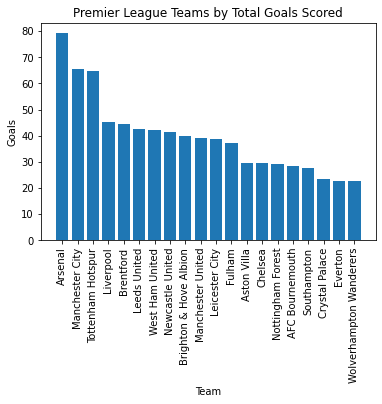

In [9]:

# create a new dataframe with the total goals scored by each team
df_goals = df.groupby('Team')['TotalGoals'].sum().reset_index()

# sort the dataframe by goals scored in descending order
df_goals = df_goals.sort_values('TotalGoals', ascending=False)

# create a bar chart of the total goals scored by each team
plt.bar(df_goals['Team'], df_goals['TotalGoals'])
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Goals')
plt.title('Premier League Teams by Total Goals Scored')
plt.show()


In [10]:
arsenal_goals = df[df['Team'] == 'Arsenal']['TotalGoals'].sum()
print("Total goals scored by Arsenal:", arsenal_goals)


Total goals scored by Arsenal: 79.19793459552494


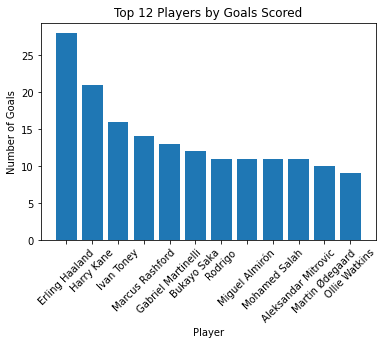

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by player name and sum up the goals
player_goals = df.groupby('Name')['TotalGoals'].sum()

# Sort the players by number of goals in descending order
player_goals = player_goals.sort_values(ascending=False)

# Select the top 12 players with the highest number of goals
top_12 = player_goals.head(12)

# Plot a bar chart of the top 12 players and their number of goals
plt.bar(top_12.index, top_12.values)
plt.title('Top 12 Players by Goals Scored')
plt.xlabel('Player')
plt.ylabel('Number of Goals')

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

plt.show()


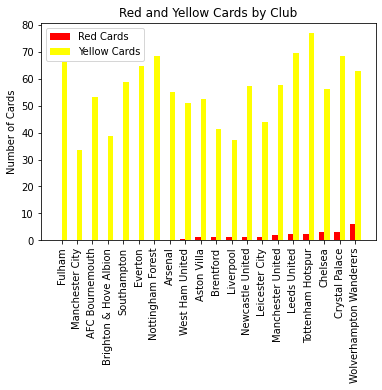

In [12]:


# Group the data by club and calculate the total red and yellow cards for each club
club_cards = df.groupby('Team')[['RedCards', 'YellowCards']].sum()

# Sort the clubs by total red cards in ascending order
club_cards = club_cards.sort_values('RedCards')

# Get the number of clubs
num_clubs = club_cards.shape[0]

# Set up the figure and axes
fig, ax = plt.subplots()

# Set the width of each bar
bar_width = 0.35

# Create an array of indices for each club
indices = np.arange(num_clubs)

# Create a bar plot for red cards
red_bars = ax.bar(indices, club_cards['RedCards'], width=bar_width, color='r', label='Red Cards')

# Create a bar plot for yellow cards
yellow_bars = ax.bar(indices + bar_width, club_cards['YellowCards'], width=bar_width, color='yellow', label='Yellow Cards')

# Set the x-axis labels and tick marks
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(club_cards.index, rotation=90)

# Set the y-axis label and title
ax.set_ylabel('Number of Cards')
ax.set_title('Red and Yellow Cards by Club')

# Add a legend
ax.legend()

# Show the plot
plt.show()


Arsenal is being one the most decipline teams this season

Lets dig into the players rating on shots on target

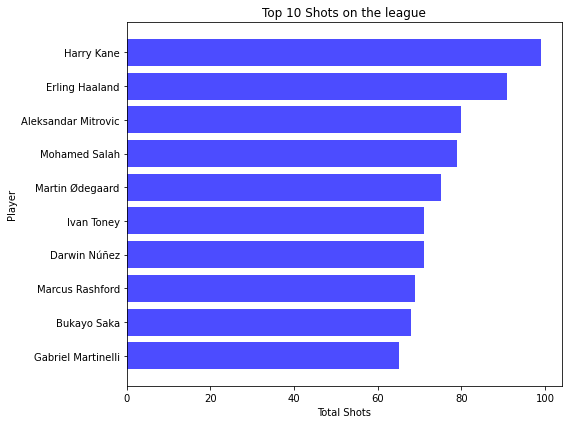

In [13]:
top_passers = df.sort_values(by='TotalShots', ascending=False).head(10)
top_passers = top_passers.sort_values(by='TotalShots', ascending=False)

plt.figure(figsize=(8, 6))
plt.barh(top_passers['Name'], top_passers['TotalShots'], color='blue', alpha=0.7)
plt.xlabel('Total Shots')
plt.ylabel('Player')
plt.title('Top 10 Shots on the league')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


There has been many officiating errors with regards to penalty. We want to see the teams that have a higher probability of getting a penalty goals. No assumption yet but unanimiously many guess is that Manchester United will lead in this aspect. 

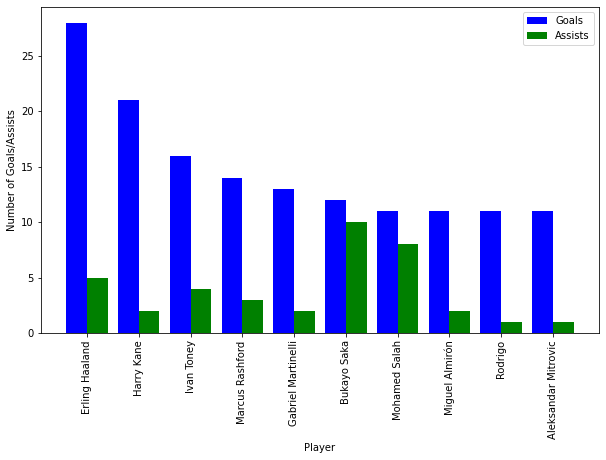

In [14]:
top_players = df.nlargest(10, ['TotalGoals', 'GoalAssists'])

# Create a bar chart showing the goals and assists for each of the top 10 players
fig, ax = plt.subplots(figsize=(10, 6))

# Set the bar widths and positions
bar_width = 0.4
bar_positions = range(10)

# Plot the bars
ax.bar([p - bar_width / 2 for p in bar_positions], top_players['TotalGoals'], width=bar_width, color='blue', label='Goals')
ax.bar([p + bar_width / 2 for p in bar_positions], top_players['GoalAssists'], width=bar_width, color='green', label='Assists')

# Set the axis labels and legend
ax.set_xlabel('Player')
ax.set_ylabel('Number of Goals/Assists')
ax.set_xticks(bar_positions)
ax.set_xticklabels(top_players['Name'])
ax.legend()

# Display the chart
plt.xticks(rotation=90)
plt.show()

Select the best 11 players based on position.

Select the best starting XI 

In [17]:
import pandas as pd


# Define the number of players for each position
positions = {'Goalkeeper': 3, 'Defender': 6, 'Midfielder': 6, 'Forward': 7}

# Find the best player for each position
top_players = []
substitutes = []

for position, count in positions.items():
    top_players.extend(df[df['Position'] == position].sort_values(by=['TotalGoals', 'GoalAssists'], ascending=False).iloc[:count].to_dict('records'))

# Find the player with the highest goal assist
best_assist_player = df.sort_values(by='GoalAssists', ascending=False).iloc[0]

# Check if the player is already in the lineup or substitutes
if best_assist_player['Name'] not in [p['Name'] for p in top_players]:
    # Check if the player's position is already filled by the starting lineup
    if positions[best_assist_player['Position']] > len([p for p in top_players if p['Position'] == best_assist_player['Position']]):
        substitutes.append(best_assist_player)
    else:
        # Find the player with the lowest goal assist in the starting lineup and replace them with the best assist player
        lowest_assist_player_index = [i for i, p in enumerate(top_players) if p['Position'] == best_assist_player['Position'] and p['GoalAssists'] == min([p['GoalAssists'] for p in top_players if p['Position'] == best_assist_player['Position']])][0]
        top_players[lowest_assist_player_index] = best_assist_player

# Add the best available substitute for each position
for position, count in positions.items():
    if len(df[df['Position'] == position]) > count:
        top_player = df[(df['Position'] == position) & ~(df['Name'].isin([p['Name'] for p in top_players]))].sort_values(by=['TotalGoals'], ascending=False).iloc[0]
        substitutes.append(top_player)

# Combine the top players for each position into a single list of 11 players
lineup = pd.DataFrame(top_players)[['Name', 'Team', 'citizenship', 'Position']]
lineup = lineup.rename(index={0: 'Starting XI'})

substitutes_df = pd.DataFrame(substitutes)[['Name', 'Team', 'citizenship', 'Position']]
substitutes_df = substitutes_df.rename(index={0: 'Substitutes'})

# Combine the starting lineup and substitutes into a single DataFrame
team = pd.concat([lineup, substitutes_df])

print(team)


                            Name               Team  citizenship    Position
Starting XI        Andy Lonergan            Everton      England  Goalkeeper
1                 Mark Gillespie   Newcastle United      England  Goalkeeper
2                William Crellin            Everton      England  Goalkeeper
3                        Ben Mee          Brentford      England    Defender
4                Virgil van Dijk          Liverpool  Netherlands    Defender
5                        Gabriel            Arsenal       Brazil    Defender
6                   Ben Chilwell            Chelsea      England    Defender
7                 Romain Perraud        Southampton       France    Defender
8                     Ben Davies  Tottenham Hotspur        Wales    Defender
9                    Bukayo Saka            Arsenal      England  Midfielder
10                Miguel Almirón   Newcastle United     Paraguay  Midfielder
11               Martin Ødegaard            Arsenal       Norway  Midfielder

In [18]:
print(substitutes_df)

                    Name               Team citizenship    Position
626       Alfie Whiteman  Tottenham Hotspur     England  Goalkeeper
113        Emerson Royal  Tottenham Hotspur      Brazil    Defender
13         Harvey Barnes     Leicester City     England  Midfielder
7    Aleksandar Mitrovic             Fulham      Serbia     Forward


In [43]:
# Juust 15 player but delete the later one if you cross check

In [71]:
# Define the number of players for each position
positions = {'Goalkeeper': 1, 'Defender': 4, 'Midfielder': 4, 'Forward': 3}

# Find the best player for each position
top_players = []
for position, count in positions.items():
    top_players.extend(df[df['Position'] == position].sort_values(by=['TotalGoals', 'GoalAssists'], ascending=False).iloc[:count].to_dict('records'))

# Add the best available substitute for each position
substitutes = []
for position, count in positions.items():
    if len(df[df['Position'] == position]) > count:
        top_player = df[(df['Position'] == position) & ~(df['Name'].isin([p['Name'] for p in top_players]))].sort_values(by=['TotalGoals'], ascending=False).iloc[0]
        substitutes.append(top_player)

# Combine the top players for each position into a single list of 11 players
lineup = pd.DataFrame(top_players)[['Name', 'Team', 'citizenship', 'Position']]
lineup = lineup.rename(index={0: 'Starting XI'})

substitutes_df = pd.DataFrame(substitutes)[['Name', 'Team', 'citizenship', 'Position']]
substitutes_df = substitutes_df.rename(index={0: 'Substitutes'})

# Combine the starting lineup and substitutes into a single DataFrame
team = pd.concat([lineup, substitutes_df])

print(team)


                        Name               Team  citizenship    Position
Starting XI    Andy Lonergan            Everton      England  Goalkeeper
1                    Ben Mee          Brentford      England    Defender
2            Virgil van Dijk          Liverpool  Netherlands    Defender
3                    Gabriel            Arsenal       Brazil    Defender
4               Ben Chilwell            Chelsea      England    Defender
5                Bukayo Saka            Arsenal      England  Midfielder
6             Miguel Almirón   Newcastle United     Paraguay  Midfielder
7            Martin Ødegaard            Arsenal       Norway  Midfielder
8             James Maddison     Leicester City      England  Midfielder
9             Erling Haaland    Manchester City       Norway     Forward
10                Harry Kane  Tottenham Hotspur      England     Forward
11                Ivan Toney          Brentford      England     Forward
626           Alfie Whiteman  Tottenham Hotspur    

In [72]:
print(lineup)

                        Name               Team  citizenship    Position
Starting XI    Andy Lonergan            Everton      England  Goalkeeper
1                    Ben Mee          Brentford      England    Defender
2            Virgil van Dijk          Liverpool  Netherlands    Defender
3                    Gabriel            Arsenal       Brazil    Defender
4               Ben Chilwell            Chelsea      England    Defender
5                Bukayo Saka            Arsenal      England  Midfielder
6             Miguel Almirón   Newcastle United     Paraguay  Midfielder
7            Martin Ødegaard            Arsenal       Norway  Midfielder
8             James Maddison     Leicester City      England  Midfielder
9             Erling Haaland    Manchester City       Norway     Forward
10                Harry Kane  Tottenham Hotspur      England     Forward
11                Ivan Toney          Brentford      England     Forward


# Teams

In [21]:
data = pd.read_excel("EPLteamStatsM.xlsx")

In [22]:
data

,Team,Hom Team,Home Goal,Away Goal,Away Team,foulsCommitted,yellowCards,redCards,offsides,wonCorners,...,totalLongBalls,accurateLongBalls,longballPct,blockedShots,effectiveTackles,totalTackles,tacklePct,interceptions,effectiveClearance,totalClearance
0,Crystal Palace,Crystal Palace,0,2,Arsenal,16,1,0,1,3,...,66,33,0.5,6,9,18,0.5,8,19,19
1,Arsenal,Crystal Palace,0,2,Arsenal,11,2,0,2,5,...,49,26,0.5,4,16,29,0.6,9,24,24
2,Fulham,Fulham,2,2,Liverpool,7,2,0,4,4,...,65,24,0.4,4,13,25,0.5,10,30,30
3,Liverpool,Fulham,2,2,Liverpool,9,0,0,4,4,...,76,40,0.5,2,9,11,0.8,10,14,14
4,AFC Bournemouth,AFC Bournemouth,2,0,Aston Villa,18,3,0,1,5,...,61,31,0.5,2,12,20,0.6,13,36,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Tottenham Hotspur,Southampton,3,3,Tottenham Hotspur,8,1,0,1,3,...,51,28,0.5,5,13,19,0.7,9,20,20
536,Chelsea,Chelsea,2,2,Everton,8,2,0,2,8,...,58,30,0.5,10,11,15,0.7,8,9,9
537,Everton,Chelsea,2,2,Everton,12,2,0,1,2,...,48,11,0.2,5,13,20,0.7,6,32,32
538,Arsenal,Arsenal,4,1,Crystal Palace,8,0,0,2,5,...,41,23,0.6,5,9,15,0.6,4,10,10


In [ ]:

# Create two new columns 'HomeTeamResult' and 'AwayTeamResult' and initialize them with 'Lose'
data['HomeTeamResult'] = 'Lose'
data['AwayTeamResult'] = 'Lose'

# Assign 'Win' to 'HomeTeamResult' if the home team scored more goals
data.loc[data['Home Goal'] > data['Away Goal'], 'HomeTeamResult'] = 'Win'

# Assign 'Win' to 'AwayTeamResult' if the away team scored more goals
data.loc[data['Home Goal'] < data['Away Goal'], 'AwayTeamResult'] = 'Win'


In [27]:
# Replace 'Win' with 1 and 'Lose' with 0 in the 'HomeTeamResult' column
data['HomeTeamResult'] = data['HomeTeamResult'].apply(lambda x: 1 if x == 'Win' else 0)

# Replace 'Win' with 1 and 'Lose' with 0 in the 'AwayTeamResult' column
data['AwayTeamResult'] = data['AwayTeamResult'].apply(lambda x: 1 if x == 'Win' else 0)


In [28]:
data.head()

,Team,Hom Team,Home Goal,Away Goal,Away Team,foulsCommitted,yellowCards,redCards,offsides,wonCorners,...,longballPct,blockedShots,effectiveTackles,totalTackles,tacklePct,interceptions,effectiveClearance,totalClearance,HomeTeamResult,AwayTeamResult
0,Crystal Palace,Crystal Palace,0,2,Arsenal,16,1,0,1,3,...,0.5,6,9,18,0.5,8,19,19,0,1
1,Arsenal,Crystal Palace,0,2,Arsenal,11,2,0,2,5,...,0.5,4,16,29,0.6,9,24,24,0,1
2,Fulham,Fulham,2,2,Liverpool,7,2,0,4,4,...,0.4,4,13,25,0.5,10,30,30,0,0
3,Liverpool,Fulham,2,2,Liverpool,9,0,0,4,4,...,0.5,2,9,11,0.8,10,14,14,0,0
4,AFC Bournemouth,AFC Bournemouth,2,0,Aston Villa,18,3,0,1,5,...,0.5,2,12,20,0.6,13,36,36,1,0


In [30]:
data.columns

Index(['Team', 'Hom Team', 'Home Goal', 'Away Goal', 'Away Team',
       'foulsCommitted', 'yellowCards', 'redCards', 'offsides', 'wonCorners',
       'saves', 'possessionPct', 'totalShots', 'shotsOnTarget', 'shotPct',
       'penaltyKickGoals', 'penaltyKickShots', 'accuratePasses', 'totalPasses',
       'passPct', 'accurateCrosses', 'totalCrosses', 'crossPct',
       'totalLongBalls', 'accurateLongBalls', 'longballPct', 'blockedShots',
       'effectiveTackles', 'totalTackles', 'tacklePct', 'interceptions',
       'effectiveClearance', 'totalClearance', 'HomeTeamResult',
       'AwayTeamResult'],
      dtype='object')

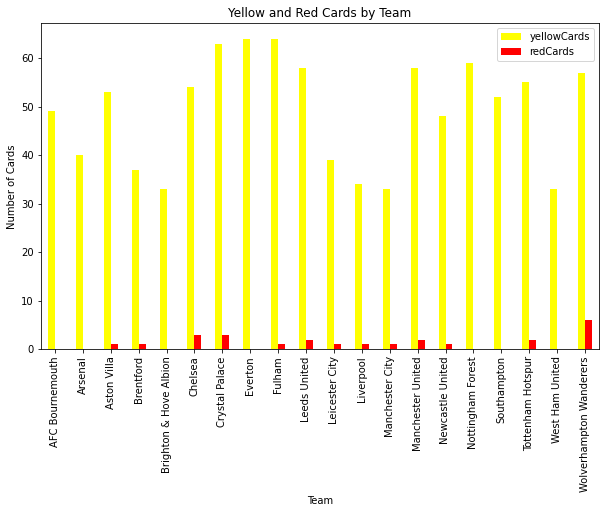

In [15]:

# Group the data by team and sum the number of yellow and red cards
cards_by_team = data.groupby('Team').sum()[['yellowCards', 'redCards']]

# Create a bar chart of the number of yellow and red cards for each team
cards_by_team.plot(kind='bar', figsize=(10, 6), color=['yellow', 'red'])
plt.title('Yellow and Red Cards by Team')
plt.xlabel('Team')
plt.ylabel('Number of Cards')
plt.show()


Let try see teams with long balls. We want to see the teams that are dangerious counter attact and long balls and duels. 

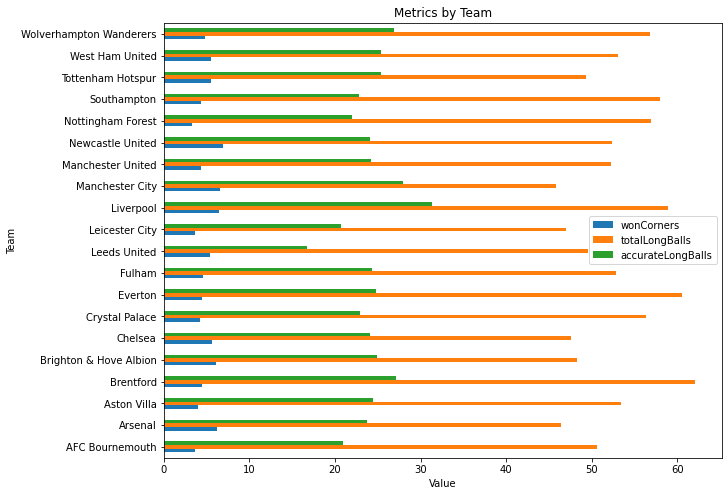

In [27]:
# Group the data by team and calculate the mean of the specified metrics
metrics_by_team = data.groupby('Team').mean()[['wonCorners', 'totalLongBalls', 'accurateLongBalls']]

# Create a horizontal bar chart for the specified metrics
metrics_by_team.plot(kind='barh', figsize=(10, 8))
plt.title('Metrics by Team')
plt.xlabel('Value')
plt.ylabel('Team')
plt.show()

Now lets see the home and away goal ratios

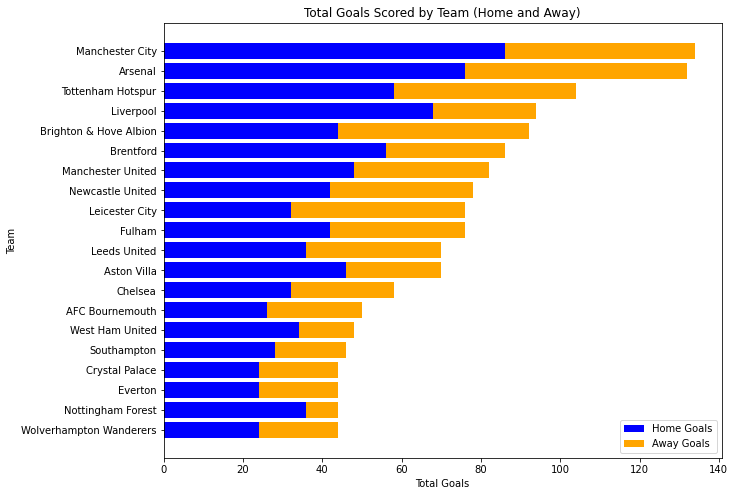

In [35]:

# Group the data by team and sum the goals
home_goals = data.groupby("Hom Team")["Home Goal"].sum()
away_goals = data.groupby("Away Team")["Away Goal"].sum()

# Combine the home and away goals for each team
total_goals = home_goals.add(away_goals, fill_value=0)

# Sort the teams by total number of goals
sorted_goals = total_goals.sort_values()

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10,8))

# Add two sets of bars for each team
ax.barh(sorted_goals.index, home_goals.loc[sorted_goals.index], color='blue', label='Home Goals')
ax.barh(sorted_goals.index, away_goals.loc[sorted_goals.index], color='orange', label='Away Goals', left=home_goals.loc[sorted_goals.index])

# Add labels and titles
ax.set_xlabel("Total Goals")
ax.set_ylabel("Team")
ax.set_title("Total Goals Scored by Team (Home and Away)")

# Add a legend
ax.legend()

plt.show()


I want to see the most defensive team. AFC is been defensive more than any other premier league team. I you are not attacking then you need to defend allot. I agree to the saying that 'the best way to defend is to attack'. Manchester City have the lowest rate in terms of defensive because they attack.

In [43]:
import pandas as pd

# Create a list of unique teams
unique_teams = data['Hom Team'].unique()

# Initialize a dictionary to store the probabilities for each team
team_win_probabilities = {}

# Iterate through the unique teams
for team in unique_teams:
    # Filter the dataset to include matches where the team is either the home team or away team
    relevant_matches = data[(data['Hom Team'] == team) | (data['Away Team'] == team)]
    
    # Calculate the total number of matches relevant to the team (both home and away)
    total_matches = len(relevant_matches)
    
    # Calculate the number of matches won by the team (both as home and away)
    team_wins = len(relevant_matches[((relevant_matches['Hom Team'] == team) & (relevant_matches['HomeTeamResult'] == 1)) | ((relevant_matches['Away Team'] == team) & (relevant_matches['AwayTeamResult'] == 1))])
    
    # Calculate the winning probability as the ratio of wins to total matches
    winning_probability = team_wins / total_matches
    
    # Store the winning probability in the dictionary
    team_win_probabilities[team] = winning_probability


In [44]:
# Iterate through the dictionary and print the probabilities for each team
for team, probability in team_win_probabilities.items():
    print(f'Team: {team}, Winning Probability: {probability:.2f}')


Team: Crystal Palace, Winning Probability: 0.21
Team: Fulham, Winning Probability: 0.41
Team: AFC Bournemouth, Winning Probability: 0.22
Team: Newcastle United, Winning Probability: 0.46
Team: Tottenham Hotspur, Winning Probability: 0.54
Team: Leeds United, Winning Probability: 0.22
Team: Everton, Winning Probability: 0.21
Team: Leicester City, Winning Probability: 0.26
Team: Manchester United, Winning Probability: 0.58
Team: West Ham United, Winning Probability: 0.23
Team: Aston Villa, Winning Probability: 0.41
Team: Manchester City, Winning Probability: 0.70
Team: Wolverhampton Wanderers, Winning Probability: 0.25
Team: Southampton, Winning Probability: 0.21
Team: Arsenal, Winning Probability: 0.79
Team: Brighton & Hove Albion, Winning Probability: 0.48
Team: Brentford, Winning Probability: 0.37
Team: Nottingham Forest, Winning Probability: 0.22
Team: Chelsea, Winning Probability: 0.37
Team: Liverpool, Winning Probability: 0.46


In the context of home team performance within the Premier League, a distinct hierarchy becomes apparent. Teams like Arsenal and Manchester City reign supreme with commanding home winning probabilities of 79% and 70%, respectively. These clubs demonstrate formidable dominance on their home turf, making their stadiums daunting fortresses for visiting teams. Manchester United follows closely with a winning probability of 58%, indicating a strong home advantage.

Another group of teams, including Liverpool (46%), Newcastle United (46%), and Brighton & Hove Albion (48%), exhibit solid performances when playing at home. They maintain competitive winning probabilities, showcasing their ability to secure victories in front of their loyal supporters. Tottenham Hotspur (54%) also falls into this category, reflecting their capability to perform well in home fixtures.

On the other hand, some teams face challenges in maintaining consistent home success. Crystal Palace (21%), Fulham (41%), AFC Bournemouth (22%), and Leeds United (22%) struggle to assert themselves as dominant forces on their home grounds. These varying home winning probabilities offer valuable insights into the strengths and vulnerabilities of Premier League teams when competing in familiar environments, reflecting the unique dynamics of each club's home advantage

In [45]:
import pandas as pd

# Create a list of unique teams
unique_teams = data['Away Team'].unique()

# Initialize a dictionary to store the probabilities for each team when playing away
team_win_probabilities_away = {}

# Iterate through the unique teams
for team in unique_teams:
    # Filter the dataset to include matches where the team is the away team
    relevant_matches_away = data[data['Away Team'] == team]
    
    # Calculate the total number of matches relevant to the team when playing away
    total_matches_away = len(relevant_matches_away)
    
    # Calculate the number of matches won by the team when playing away
    team_wins_away = len(relevant_matches_away[relevant_matches_away['AwayTeamResult'] == 1])
    
    # Calculate the winning probability as the ratio of wins to total matches when playing away
    winning_probability_away = team_wins_away / total_matches_away
    
    # Store the winning probability in the dictionary
    team_win_probabilities_away[team] = winning_probability_away


In [46]:
# Iterate through the dictionary and print the winning probabilities for each team when playing away
for team, probability in team_win_probabilities_away.items():
    print(f"Team: {team}, Win Probability (Away): {probability}")


Team: Arsenal, Win Probability (Away): 0.7857142857142857
Team: Liverpool, Win Probability (Away): 0.23076923076923078
Team: Aston Villa, Win Probability (Away): 0.3076923076923077
Team: Nottingham Forest, Win Probability (Away): 0.07692307692307693
Team: Southampton, Win Probability (Away): 0.2857142857142857
Team: Wolverhampton Wanderers, Win Probability (Away): 0.14285714285714285
Team: Chelsea, Win Probability (Away): 0.2857142857142857
Team: Brentford, Win Probability (Away): 0.23076923076923078
Team: Brighton & Hove Albion, Win Probability (Away): 0.4166666666666667
Team: Manchester City, Win Probability (Away): 0.5714285714285714
Team: Everton, Win Probability (Away): 0.07142857142857142
Team: AFC Bournemouth, Win Probability (Away): 0.14285714285714285
Team: Fulham, Win Probability (Away): 0.38461538461538464
Team: Leeds United, Win Probability (Away): 0.14285714285714285
Team: Leicester City, Win Probability (Away): 0.2857142857142857
Team: Newcastle United, Win Probability (A

When analyzing the away winning probabilities of Premier League teams, distinct trends and performance patterns emerge. Firstly, there are standout performers who exhibit remarkable consistency when playing on the road. Teams like Manchester City and Manchester United command high away winning probabilities of 57.1% and 46.2%, respectively, underscoring their strength and adaptability in different stadiums. Arsenal and Brighton & Hove Albion also impress with probabilities of 78.6% and 41.7%, respectively, showcasing their prowess in securing victories away from home. Fulham and Tottenham Hotspur, with probabilities of 38.5% and 35.7%, respectively, fall into the category of solid away performers, highlighting their ability to challenge opponents in diverse settings.

Conversely, some teams face challenges when playing away. Everton struggles more on the road, with a relatively low away winning probability of 7.1%. Nottingham Forest (7.7%), Wolverhampton Wanderers (14.3%), and West Ham United (7.7%) also grapple with achieving consistent away success. Others, like Southampton (28.6%) and Crystal Palace (14.3%), exhibit variable performances, sometimes securing away victories but not consistently. These away winning probabilities offer valuable insights into the dynamics of Premier League teams in unfamiliar environments, shedding light on their strengths and areas requiring improvement when playing away from home.

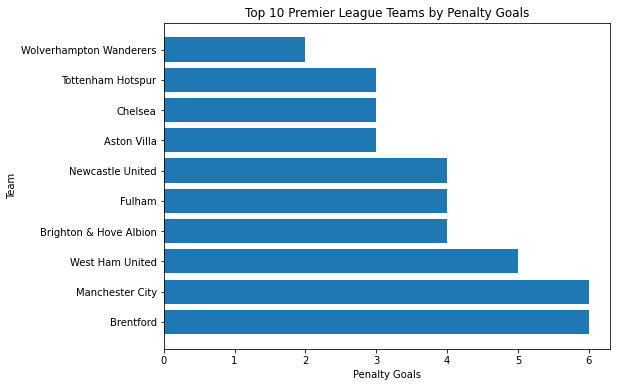

In [65]:
# group the data by team and sum the number of penalty goals
team_penalty_goals = data.groupby('Team')['penaltyKickGoals'].sum().sort_values(ascending=False)[:10]

# create the plot
plt.figure(figsize=(8,6))
plt.barh(team_penalty_goals.index, team_penalty_goals.values)
plt.title('Top 10 Premier League Teams by Penalty Goals')
plt.xlabel('Penalty Goals')
plt.ylabel('Team')
plt.show()

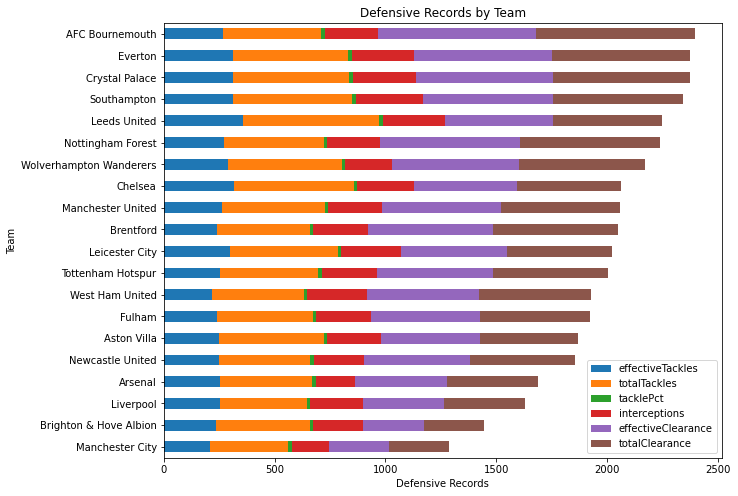

In [66]:

# Group the data by team and sum the defensive measures
defensive_records = data.groupby("Team")[["effectiveTackles", "totalTackles", "tacklePct", "interceptions", "effectiveClearance", "totalClearance"]].sum()

# Calculate the total defensive records for each team
total_records = defensive_records.sum(axis=1)

# Sort the teams by total defensive records
sorted_records = total_records.sort_values()

# Create a stacked bar chart
ax = defensive_records.loc[sorted_records.index].plot(kind="barh", stacked=True, figsize=(10, 8))

# Set the axis labels and title
ax.set_xlabel("Defensive Records")
ax.set_ylabel("Team")
ax.set_title("Defensive Records by Team")

# Show the plot
plt.show()


# PREDICTING THE PRICE OF PLAYERS

In [84]:
import pandas as pd
import numpy as np

In [85]:
df = pd.read_csv("C:/Users/Sankung/Downloads/players_all.csv")


In [86]:
df.head()

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,...,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace
0,T. Alderweireld CB,33,82,82,Antwerp\n2022 ~ 2025,184087,"186cm / 6'1""",81kg / 179lbs,Right,82,...,16,14,1995,411,3,54,56,74,67,82
1,Gabri Veiga CM CAM,20,71,85,Celta de Vigo\n2019 ~ 2026,258729,"184cm / 6'0""",71kg / 157lbs,Right,75,...,6,9,1844,401,2,71,73,66,75,54
2,K. Havertz CAM RW ST,23,83,89,Chelsea\n2020 ~ 2025,235790,"190cm / 6'3""",82kg / 181lbs,Left,86,...,10,12,2051,435,3,81,79,79,83,45
3,N. Jackson ST CAM LM,21,75,83,Villarreal\n2020 ~ 2026,259197,"186cm / 6'1""",78kg / 172lbs,Right,77,...,7,7,1837,402,1,77,76,61,76,42
4,N. Zaniolo CF RW RM,22,80,84,Galatasaray\n2023 ~ 2027,238067,"190cm / 6'3""",79kg / 174lbs,Left,81,...,13,5,2081,457,2,85,74,72,81,62


In [87]:
# Extract contract start and end dates
df['Contract Start'] = df['Team & Contract'].str.split('\n').str[1].str.split(' ~ ').str[0]
df['Contract End'] = df['Team & Contract'].str.split('\n').str[1].str.split(' ~ ').str[1]

# Convert contract start and end columns to datetime
df['Contract Start'] = pd.to_datetime(df['Contract Start'], errors='coerce')
df['Contract End'] = pd.to_datetime(df['Contract End'], errors='coerce')

# Calculate contract duration
df['Contract Duration'] = (df['Contract End'] - df['Contract Start']).dt.days

print(df[['name', 'Contract Start', 'Contract End']])

                         name Contract Start Contract End
0          T. Alderweireld CB     2022-01-01   2025-01-01
1          Gabri Veiga CM CAM     2019-01-01   2026-01-01
2        K. Havertz CAM RW ST     2020-01-01   2025-01-01
3        N. Jackson ST CAM LM     2020-01-01   2026-01-01
4         N. Zaniolo CF RW RM     2023-01-01   2027-01-01
...                       ...            ...          ...
3115           F. Oppegård LB            NaT          NaT
3116  22 I. Šaranić CAM RW CM     2019-01-01   2027-01-01
3117    N. Dorgeles ST LM CAM            NaT          NaT
3118             D. Guindo LB     2021-01-01   2025-01-01
3119  22 Eder González CM CAM     2021-01-01   2023-01-01

[3120 rows x 3 columns]


Contract duration greatly affect the price of players.

In [88]:

# Function to convert height in centimeters
def convert_height(height_str):
    height_cm = height_str.split('cm')[0].strip()  # Extract numeric value
    return int(height_cm)

# Function to convert weight in kilograms
def convert_weight(weight_str):
    weight_kg = weight_str.split('kg')[0].strip()  # Extract numeric value
    return int(weight_kg)

# Apply conversion functions to height and weight columns
df['Height'] = df['Height'].apply(convert_height)
df['Weight'] = df['Weight'].apply(convert_weight)




In [89]:
# Perform one-hot encoding on the 'foot' column
one_hot = pd.get_dummies(df['foot'], prefix='foot')

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, one_hot], axis=1)

# Remove duplicates based on the 'name' column
df = df.drop_duplicates(subset='name')


In [90]:
import pandas as pd
import re

# Function to convert value string to numeric
def convert_value(value_str):
    if value_str == '€0':
        return 0
    
    if 'M' in value_str:
        value = float(re.sub('[^\d.]', '', value_str)) * 1000000
    elif 'K' in value_str:
        value = float(re.sub('[^\d.]', '', value_str)) * 1000
    else:
        value = float(value_str)
    return value

# Apply the conversion function to the "Value" column
df["Value"] = df["Value"].apply(convert_value)

# Check the updated DataFrame
df.head()


,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,...,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Contract Start,Contract End,Contract Duration,foot_Left,foot_Right
0,T. Alderweireld CB,33,82,82,Antwerp\n2022 ~ 2025,184087,186,81,Right,82,...,54,56,74,67,82,2022-01-01,2025-01-01,1096.0,0,1
1,Gabri Veiga CM CAM,20,71,85,Celta de Vigo\n2019 ~ 2026,258729,184,71,Right,75,...,71,73,66,75,54,2019-01-01,2026-01-01,2557.0,0,1
2,K. Havertz CAM RW ST,23,83,89,Chelsea\n2020 ~ 2025,235790,190,82,Left,86,...,81,79,79,83,45,2020-01-01,2025-01-01,1827.0,1,0
3,N. Jackson ST CAM LM,21,75,83,Villarreal\n2020 ~ 2026,259197,186,78,Right,77,...,77,76,61,76,42,2020-01-01,2026-01-01,2192.0,0,1
4,N. Zaniolo CF RW RM,22,80,84,Galatasaray\n2023 ~ 2027,238067,190,79,Left,81,...,85,74,72,81,62,2023-01-01,2027-01-01,1461.0,1,0


In [91]:
df['Value']

0       14500000.0
1        4500000.0
2       57500000.0
3       12500000.0
4       31000000.0
           ...    
3115     1600000.0
3116     1500000.0
3117     1400000.0
3118     2100000.0
3119      975000.0
Name: Value, Length: 2744, dtype: float64

In [92]:
df.nlargest(5, columns="Value")

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,...,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Contract Start,Contract End,Contract Duration,foot_Left,foot_Right
172,K. Mbappé ST LW,23,91,95,Paris Saint Germain\n2018 ~ 2024,231747,182,75,Right,92,...,97,89,80,92,36,2018-01-01,2024-01-01,2191.0,0,1
57,E. Haaland ST,21,90,94,Manchester City\n2022 ~ 2027,239085,195,94,Left,92,...,89,92,65,80,48,2022-01-01,2027-01-01,1826.0,1,0
136,Vinícius Jr. LW,21,86,92,Real Madrid\n2018 ~ 2025,238794,176,73,Right,86,...,95,79,74,90,29,2018-01-01,2025-01-01,2557.0,0,1
201,K. De Bruyne CM CAM,31,91,91,Manchester City\n2015 ~ 2025,192985,181,75,Right,91,...,74,88,93,86,63,2015-01-01,2025-01-01,3653.0,0,1
383,Rúben Dias CB,25,88,91,Manchester City\n2020 ~ 2027,239818,187,82,Right,90,...,62,39,66,68,88,2020-01-01,2027-01-01,2557.0,0,1


In [93]:
df['Overall rating'] = pd.to_numeric(df['Overall rating'])
df.nlargest(5, 'Overall rating')


,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,...,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Contract Start,Contract End,Contract Duration,foot_Left,foot_Right
7,K. Benzema CF ST,34,91,91,Real Madrid\n2009 ~ 2023,165153,185,81,Right,91,...,79,88,83,87,39,2009-01-01,2023-01-01,5113.0,0,1
123,R. Lewandowski ST,33,91,91,FC Barcelona\n2022 ~ 2025,188545,185,81,Right,91,...,75,91,79,86,44,2022-01-01,2025-01-01,1096.0,0,1
130,L. Messi RW,35,91,91,Paris Saint Germain\n2021 ~ 2023,158023,169,67,Left,92,...,81,89,90,94,34,2021-01-01,2023-01-01,730.0,1,0
172,K. Mbappé ST LW,23,91,95,Paris Saint Germain\n2018 ~ 2024,231747,182,75,Right,92,...,97,89,80,92,36,2018-01-01,2024-01-01,2191.0,0,1
201,K. De Bruyne CM CAM,31,91,91,Manchester City\n2015 ~ 2025,192985,181,75,Right,91,...,74,88,93,86,63,2015-01-01,2025-01-01,3653.0,0,1


In [94]:
# List of columns to exclude from conversion
exclude_columns = ['Name', 'Team & Contract', 'Contract Start', 'Contract End']

# Convert columns to numeric
for column in df.columns:
    if column not in exclude_columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')

# Check for non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

if len(non_numeric_columns) > 0:
    print("Non-numeric columns found:")
    print(non_numeric_columns)
else:
    print("All columns are numeric.")


Non-numeric columns found:
Index(['Team & Contract', 'Contract Start', 'Contract End'], dtype='object')


In [95]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

if len(non_numeric_columns) > 0:
    print("Non-numeric columns found:")
    print(non_numeric_columns)
else:
    print("All columns are numeric.")


Non-numeric columns found:
Index(['Team & Contract', 'Contract Start', 'Contract End'], dtype='object')


In [96]:
top_5_teams = df['Team & Contract'].str.split('\n', expand=True)[0].groupby(df['Team & Contract'].str.split('\n', expand=True)[0]).size().nlargest(5)
top_5_teams


0
Chelsea         34
Liverpool       34
FC Barcelona    31
Real Madrid     30
Arsenal         25
Name: 0, dtype: int64

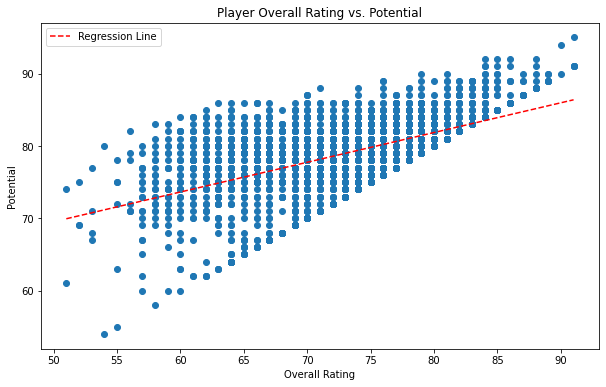

In [97]:
import numpy as np
import matplotlib.pyplot as plt

# Scatter plot of 'Overall Rating' vs 'Potential'
plt.figure(figsize=(10, 6))
plt.scatter(df['Overall rating'], df['Potential'])
plt.xlabel('Overall Rating')
plt.ylabel('Potential')
plt.title('Player Overall Rating vs. Potential')

# Fit a line to the scatter plot
x = df['Overall rating']
y = df['Potential']
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = polynomial(x_fit)
plt.plot(x_fit, y_fit, color='red', linestyle='--', label='Regression Line')

plt.legend()
plt.show()


In [98]:
float_columns = df.select_dtypes(include='float')



In [99]:
df.fillna(df.mean(), inplace=True)


C:\Users\Sankung\AppData\Local\Temp\ipykernel_10032\1920348818.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)
C:\Users\Sankung\AppData\Local\Temp\ipykernel_10032\1920348818.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [100]:
df.isnull().sum()

name                 2744
Age                     0
Overall rating          0
Potential               0
Team & Contract         0
                     ... 
Contract Start        406
Contract End          406
Contract Duration       0
foot_Left               0
foot_Right              0
Length: 69, dtype: int64

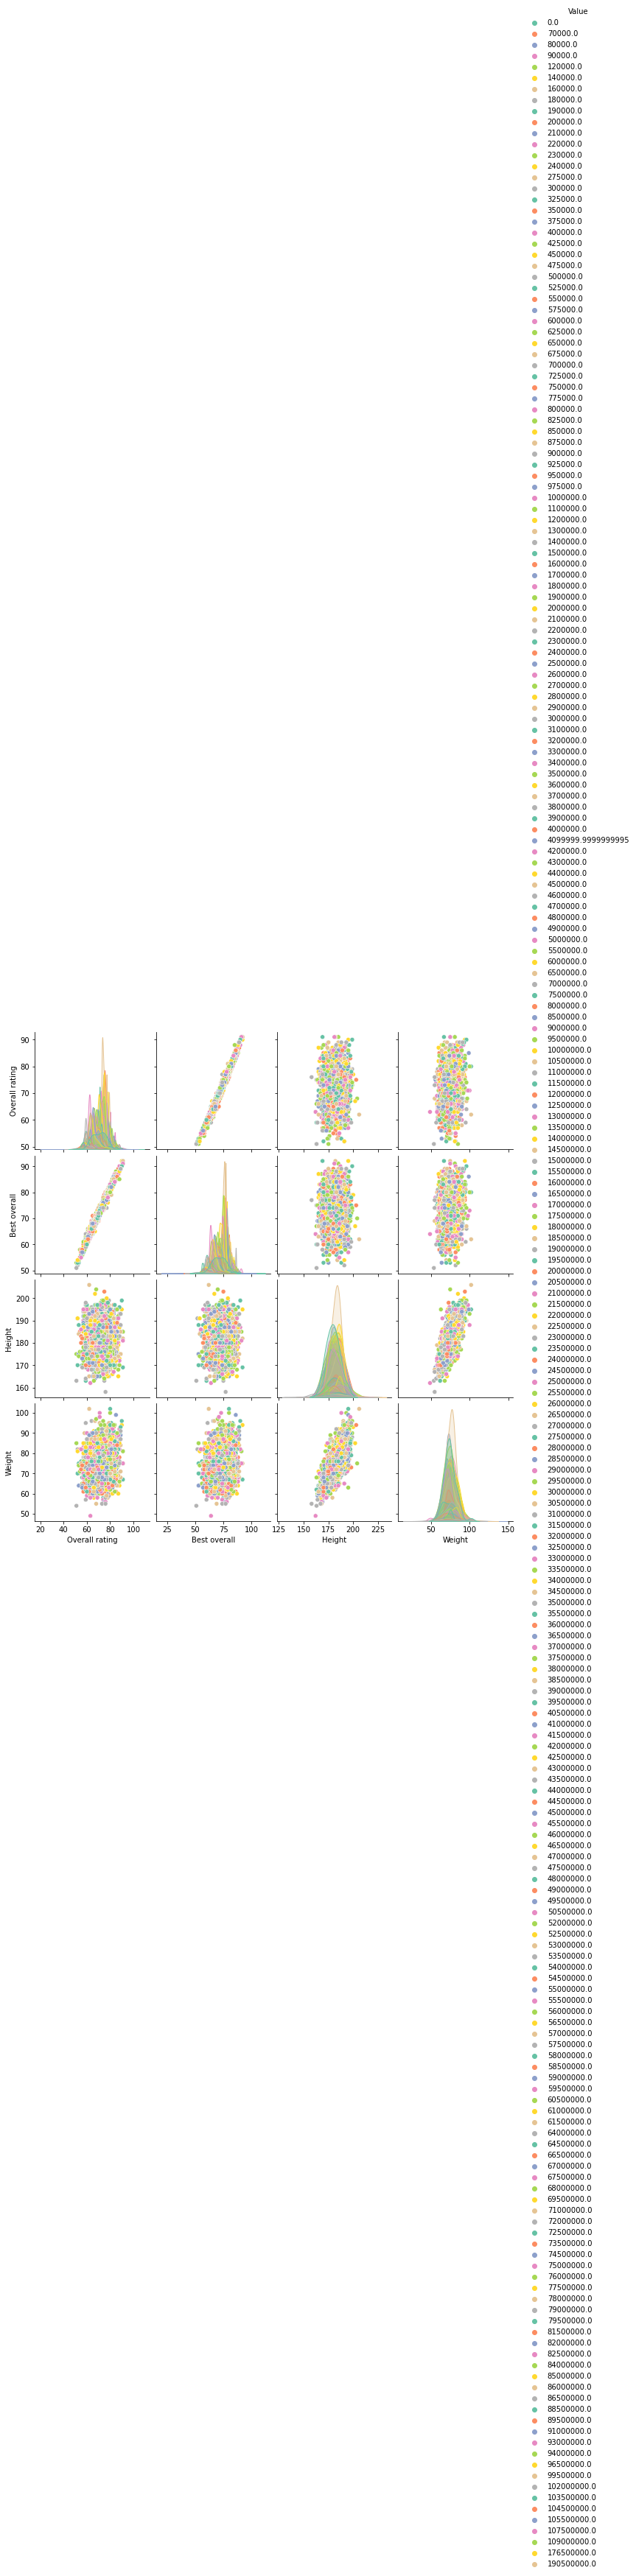

In [28]:
import seaborn as sns
# Select features for pairwise scatter plots
scatter_features = ["Overall rating", 'Best overall', 'Height', 'Weight']

# Create pairwise scatter plots
sns.pairplot(data=df, vars=scatter_features, hue='Value', palette='Set2')
plt.show()


In [101]:
error_columns = []

for column in df.columns:
    if df[column].dtype == 'datetime64[ns]':
        error_columns.append(column)

print("Columns with datetime values:")
print(error_columns)


Columns with datetime values:
['Contract Start', 'Contract End']


In [102]:
# Drop the original datetime columns
df = df.drop(['Contract Start', 'Contract End', 'Team & Contract', 'name', 'foot', 'ID', 'Best position', 'Wage', 'Release clause','foot_Left'], axis=1)

In [103]:

# Create a boolean mask for non-zero values
mask = df['Value'] > 0

# Apply log only to non-zero values and assign the result to df['Value']
df['Value'] = np.log(df.loc[mask, 'Value'])


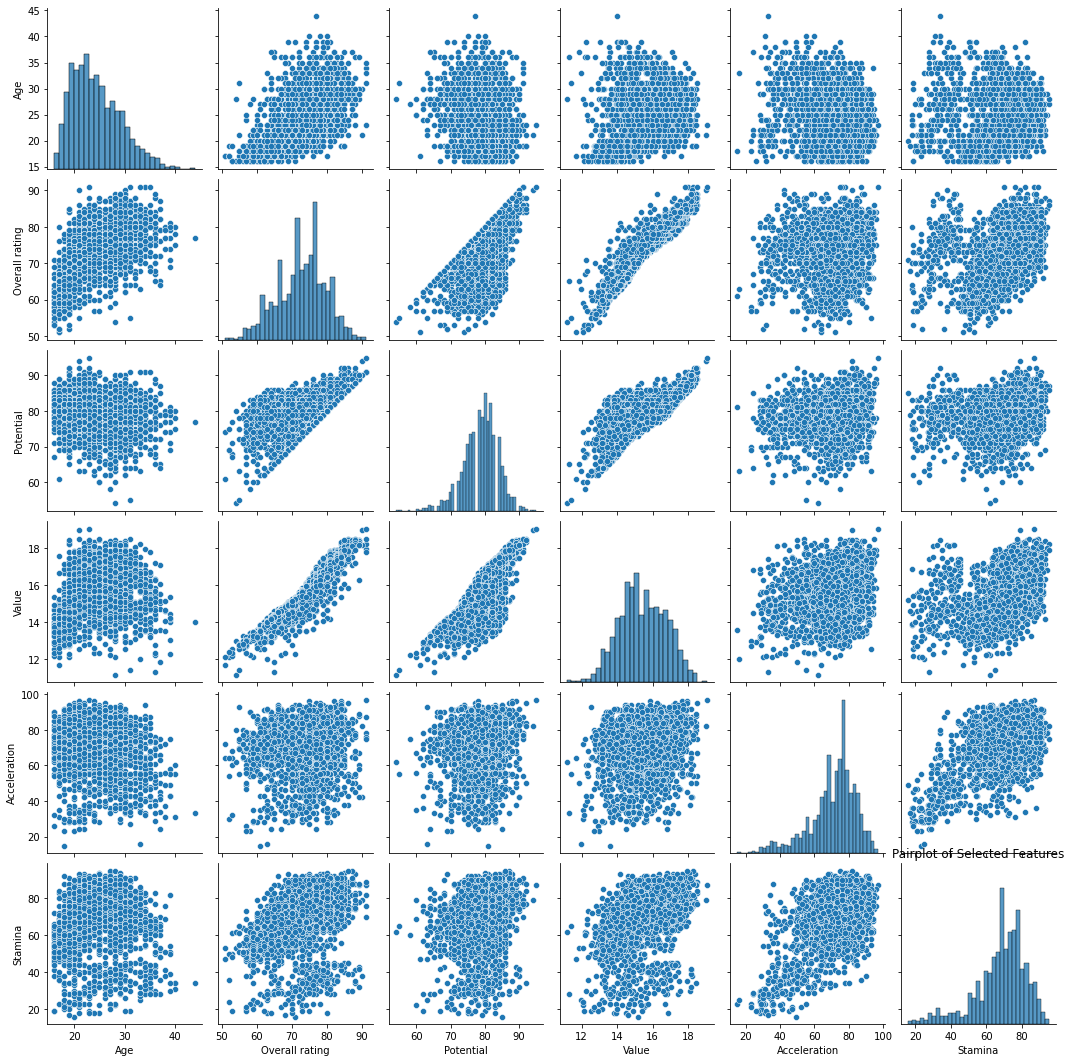

In [138]:
# Pairplot
features = ['Age', 'Overall rating', 'Potential', 'Value', 'Acceleration', 'Stamina']
sns.pairplot(df[features])
plt.title('Pairplot of Selected Features')
plt.show()


In [104]:
# Find highly correlated variables
corr_matrix = df.drop('Value', axis=1).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.75
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

# Drop highly correlated columns (excluding 'Value')
to_drop = [col for col in to_drop if col != 'Value']
df = df.drop(to_drop, axis=1)


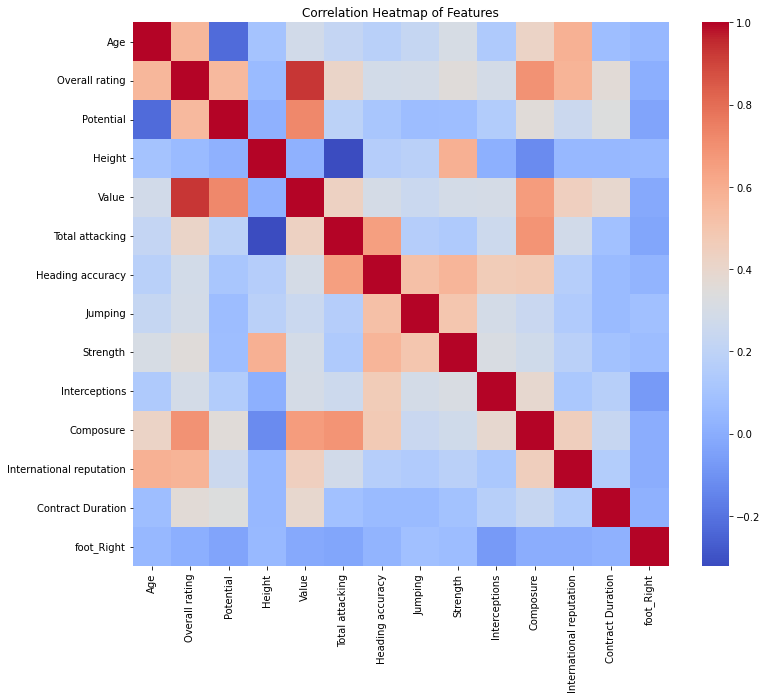

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Heatmap
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Features')
plt.show()


In [106]:
error_columns = []
for column in df.columns:
    try:
        df[column] = df[column].astype(float)
    except ValueError:
        error_columns.append(column)

print("Columns with non-numeric values:")
print(error_columns)


Columns with non-numeric values:
[]


In [107]:

columns_with_null = df.columns[df.isnull().any()]

print(columns_with_null)


Index(['Value'], dtype='object')


In [108]:
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Impute missing values in the dataset
imputed_data = imputer.fit_transform(df)


In [109]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error




In [110]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Separate the target variable ('target_variable') from the features in your DataFrame ('df')
X = df.drop('Value', axis=1)  # Features
y = df['Value']  # Target variable

# Create an instance of the SimpleImputer class
imputer = SimpleImputer(strategy='mean')

# Impute missing values in 'y'
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_imputed, test_size=0.2, random_state=42)

# Create an instance of the LinearRegression class
linear_regression = LinearRegression()

# Fit the model on the training data
linear_regression.fit(X_train, y_train)

# Make predictions on the testing data
linear_regression_predictions = linear_regression.predict(X_test)

# Calculate the mean squared error
linear_regression_mse = mean_squared_error(y_test, linear_regression_predictions)
linear_regression_mse

0.09534265285830133

In [111]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_squared_error, r2_score


In [112]:
# Random Forest
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
random_forest_train_predictions = random_forest.predict(X_train)
random_forest_train_r2 = r2_score(y_train, random_forest_train_predictions)
random_forest_train_rmse = np.sqrt(mean_squared_error(y_train, random_forest_train_predictions))
random_forest_test_predictions = random_forest.predict(X_test)
random_forest_test_r2 = r2_score(y_test, random_forest_test_predictions)
random_forest_test_rmse = np.sqrt(mean_squared_error(y_test, random_forest_test_predictions))

print("Random Forest:")
print("Train R-squared:", random_forest_train_r2)
print("Train RMSE:", random_forest_train_rmse)
print("Test R-squared:", random_forest_test_r2)
print("Test RMSE:", random_forest_test_rmse)
print()

Random Forest:
Train R-squared: 0.9945348405319114
Train RMSE: 0.09408639118576155
Test R-squared: 0.966186336074836
Test RMSE: 0.24267076625731712



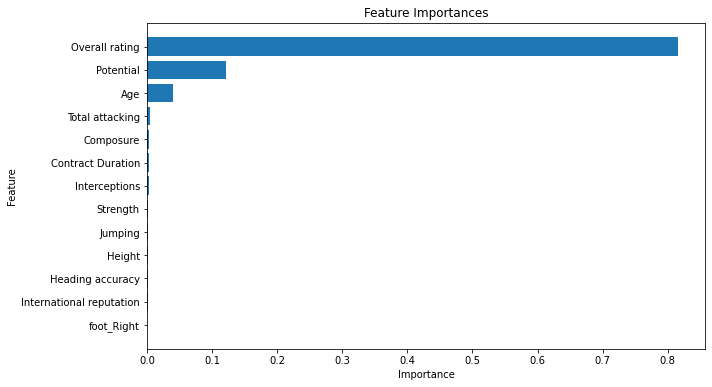

In [114]:

# Get feature importances from the trained model
feature_importances = random_forest.feature_importances_

# Create a DataFrame to associate feature names with their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()


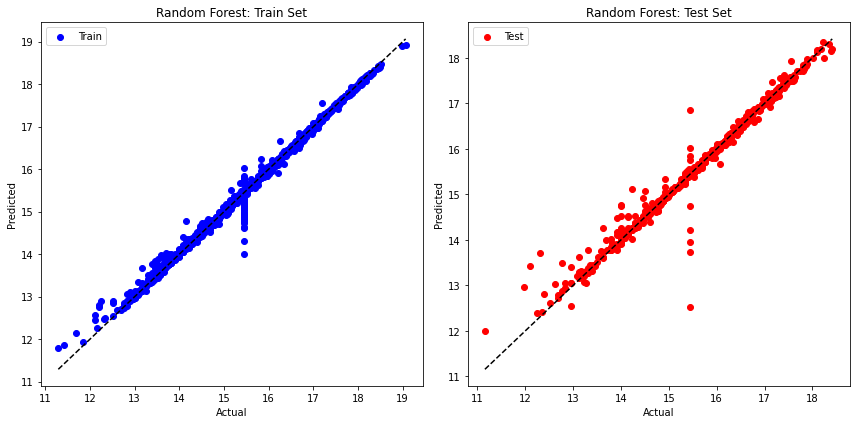

In [113]:
import matplotlib.pyplot as plt

# Plotting Random Forest
plt.figure(figsize=(12, 6))

# Train set
plt.subplot(1, 2, 1)
plt.scatter(y_train, random_forest_train_predictions, color='blue', label='Train')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='black', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest: Train Set')
plt.legend()

# Test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, random_forest_test_predictions, color='red', label='Test')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest: Test Set')
plt.legend()

plt.tight_layout()
plt.show()


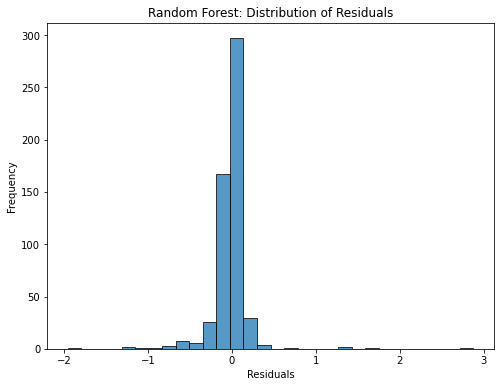

In [132]:
# Distribution of Residuals for Random Forest
residuals_rf = y_test - random_forest_test_predictions
plt.figure(figsize=(8, 6))
plt.hist(residuals_rf, bins=30, edgecolor='black', alpha=0.75)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Random Forest: Distribution of Residuals')
plt.show()


In [163]:
# SVR
svr = SVR()
svr.fit(X_train, y_train)
svr_train_predictions = svr.predict(X_train)
svr_train_r2 = r2_score(y_train, svr_train_predictions)
svr_train_rmse = np.sqrt(mean_squared_error(y_train, svr_train_predictions))
svr_test_predictions = svr.predict(X_test)
svr_test_r2 = r2_score(y_test, svr_test_predictions)
svr_test_rmse = np.sqrt(mean_squared_error(y_test, svr_test_predictions))

print("SVR:")
print("Train R-squared:", svr_train_r2)
print("Train RMSE:", svr_train_rmse)
print("Test R-squared:", svr_test_r2)
print("Test RMSE:", svr_test_rmse)
print()

SVR:
Train R-squared: 0.4294264551007383
Train RMSE: 0.961349284012512
Test R-squared: 0.38317527484226555
Test RMSE: 1.0364592516038287



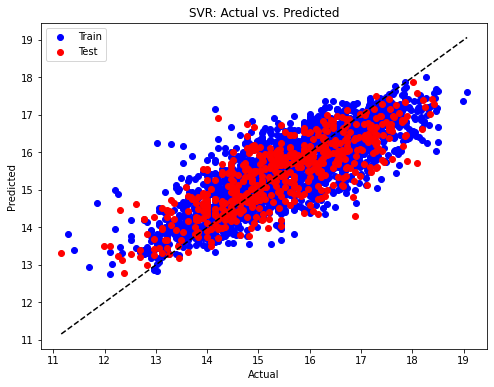

In [121]:
# Plotting SVR
plt.figure(figsize=(8, 6))
plt.scatter(y_train, svr_train_predictions, color='blue', label='Train')
plt.scatter(y_test, svr_test_predictions, color='red', label='Test')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='black', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR: Actual vs. Predicted')
plt.legend()
plt.show()

In [164]:

from sklearn.linear_model import Lasso, Ridge

# Lasso Regression
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_train_predictions = lasso.predict(X_train)
lasso_train_r2 = r2_score(y_train, lasso_train_predictions)
lasso_train_rmse = np.sqrt(mean_squared_error(y_train, lasso_train_predictions))
lasso_test_predictions = lasso.predict(X_test)
lasso_test_r2 = r2_score(y_test, lasso_test_predictions)
lasso_test_rmse = np.sqrt(mean_squared_error(y_test, lasso_test_predictions))

print("Lasso Regression:")
print("Train R-squared:", lasso_train_r2)
print("Train RMSE:", lasso_train_rmse)
print("Test R-squared:", lasso_test_r2)
print("Test RMSE:", lasso_test_rmse)
print()



Lasso Regression:
Train R-squared: 0.8793298055368124
Train RMSE: 0.44210497068819965
Test R-squared: 0.8750168927861038
Test RMSE: 0.4665487221651641



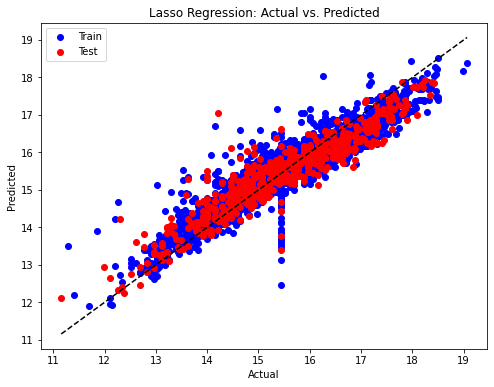

In [119]:
import matplotlib.pyplot as plt

# Plotting Lasso Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_train, lasso_train_predictions, color='blue', label='Train')
plt.scatter(y_test, lasso_test_predictions, color='red', label='Test')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='black', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso Regression: Actual vs. Predicted')
plt.legend()
plt.show()



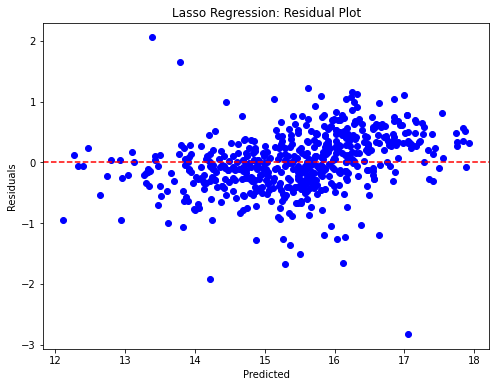

In [131]:
# Residual plot for Lasso Regression
residuals_lasso = y_test - lasso_test_predictions
plt.figure(figsize=(8, 6))
plt.scatter(lasso_test_predictions, residuals_lasso, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Lasso Regression: Residual Plot')
plt.show()


In [165]:
# Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_train_predictions = ridge.predict(X_train)
ridge_train_r2 = r2_score(y_train, ridge_train_predictions)
ridge_train_rmse = np.sqrt(mean_squared_error(y_train, ridge_train_predictions))
ridge_test_predictions = ridge.predict(X_test)
ridge_test_r2 = r2_score(y_test, ridge_test_predictions)
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, ridge_test_predictions))

print("Ridge Regression:")
print("Train R-squared:", ridge_train_r2)
print("Train RMSE:", ridge_train_rmse)
print("Test R-squared:", ridge_test_r2)
print("Test RMSE:", ridge_test_rmse)


Ridge Regression:
Train R-squared: 0.9432522152931737
Train RMSE: 0.3031795106939499
Test R-squared: 0.9452568191025108
Test RMSE: 0.3087708973556154


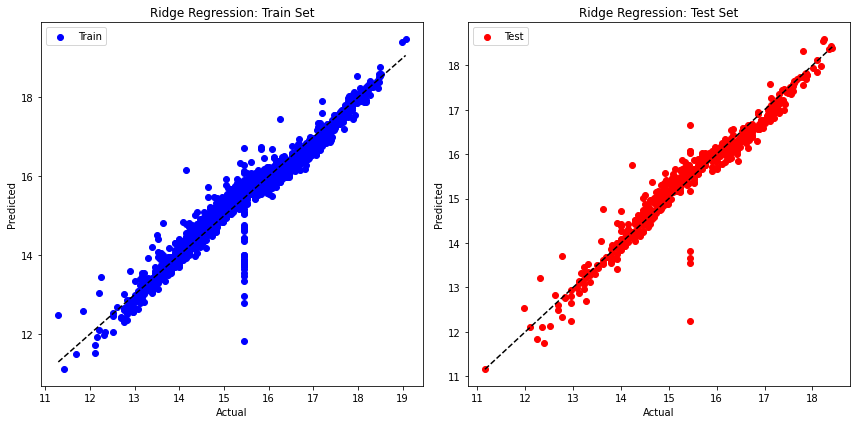

In [129]:
import matplotlib.pyplot as plt

# Plotting Ridge Regression
plt.figure(figsize=(12, 6))

# Train set
plt.subplot(1, 2, 1)
plt.scatter(y_train, ridge_train_predictions, color='blue', label='Train')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='black', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression: Train Set')
plt.legend()

# Test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, ridge_test_predictions, color='red', label='Test')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression: Test Set')
plt.legend()

plt.tight_layout()
plt.show()
